# 5 Miyazaki 2018 reward
reproduce results of the theses 

In [9]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("スクリプトを表示する");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

In [13]:
# please import twice if it do not work well 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})


In [14]:
from scipy.stats import norm 

### graph setting 

In [15]:
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

### Parameter setting

In [16]:
mu = 5. 
sigma = 2.
t = np.linspace(0,20,200)
tau = t[1] - t[0]
beta =50 
print("tau : ",tau)
# loc means "mean" , scale means "standard deviation"
nm = norm(loc = mu,scale = sigma)

tau :  0.10050251256281408


## Fig 7a. top 

Text(0.5,1,'Fig 7a top')

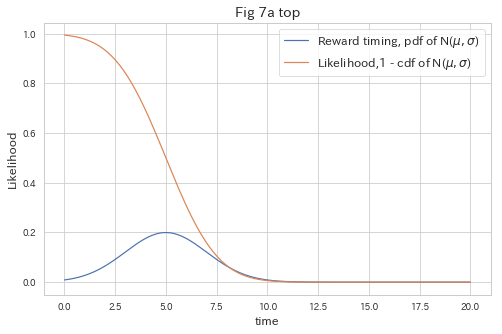

In [17]:
y = nm.pdf(t)
yy = 1 - nm.cdf(t)

plt.plot(t,y,label="Reward timing, pdf of N($\mu,\sigma$)")
plt.plot(t,yy,label  ="Likelihood,1 - cdf of N($\mu,\sigma$)")
plt.xlabel("time")
plt.ylabel("Likelihood")
plt.legend()
plt.title("Fig 7a top")

## Fig 7a middle 

mu :  5.0 ,sigma :  2.0


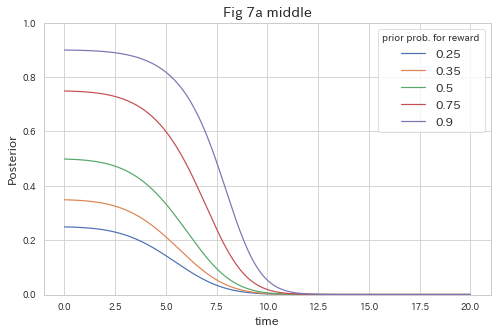

In [18]:
print("mu : ",mu,",sigma : ",sigma)
PRewards =[0.25,0.35,0.5,0.75,0.9] 
for PReward in PRewards:
    PPosterior = PReward*yy/( PReward*yy + 1- PReward )
    plt.plot(t,PPosterior,label=str(PReward))
plt.ylim([0,1])
plt.xlabel("time")
plt.ylabel("Posterior")
plt.title("Fig 7a middle")
plt.legend(title="prior prob. for reward")

## P(wait|t)  

Text(0.5,1,'P(wait|t)')

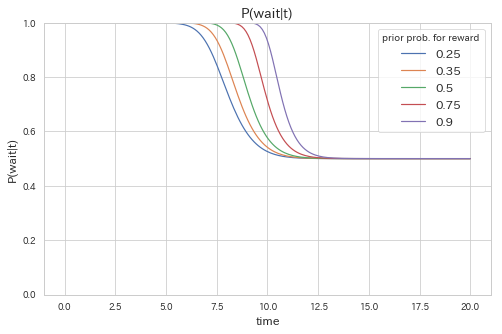

In [19]:

for PReward in PRewards:
    PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
    PWait =   1 / (1 + np.exp(-beta*PPosterior))
    plt.plot(t,PWait,label=str(PReward))
plt.ylim([0,1])
plt.xlabel("time")
plt.ylabel("P(wait|t)")
plt.legend(title="prior prob. for reward")
plt.title("P(wait|t)")

## Waiting, probability of quitting at time t

Text(0.5,1,'Fig 7a bottom. Waiting, Prob. of quit')

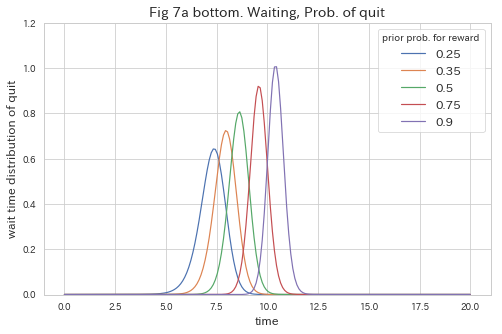

In [20]:
for PReward in PRewards:
    PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
    PWait =   1 / (1 + np.exp(-beta*PPosterior))
    Pwaitings = [1]
    Pquit = []
    for pw in PWait:
        Pquit.append(Pwaitings[-1]*(1-pw))
        Pwaitings.append(Pwaitings[-1]*pw)

    plt.plot(t,Pquit/(np.sum(Pquit)*tau),label=str(PReward))

plt.ylim([0,1.2])
plt.xlabel("time")
plt.ylabel("wait time distribution of quit")
plt.legend(title="prior prob. for reward")
plt.title("Fig 7a bottom. Waiting, Prob. of quit")


# Summing up  

In [30]:
def pr_all(mu=5,sigma =2,bins = 200,beta = 50,PRewards =[0.25,0.35,0.5,0.75,0.9] ):
    t = np.linspace(0,20,bins)
    tau = t[1] - t[0]
    nm = norm(loc = mu,scale = sigma)
    print("mu : ",mu,",sigma : ",sigma)
    print("tau :",t[1] - t[0])
    y = nm.pdf(t)
    yy = 1 - nm.cdf(t)

    plt.plot(t,y,label="Reward timing, pdf of N($\mu,\sigma$)")
    plt.plot(t,yy,label  ="Likelihood,1 - cdf of N($\mu,\sigma$)")
    plt.xlabel("time")
    plt.ylabel("Likelihood")
    plt.legend()
    plt.title("Fig 7a top")
    plt.show()

    # Fig 7A middle
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1- PReward )
        plt.plot(t,PPosterior,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("Posterior")
    plt.title("Fig 7a middle")
    plt.legend(title="prior prob. for reward")
    plt.show()

    # P(wait|reward)
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        plt.plot(t,PWait,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("P(wait|t)")
    plt.legend(title="prior prob. for reward")
    plt.title("P(wait|t)")
    plt.show()

    # probability of quitting 
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        Pwaitings = [1]
        Pquit = []
        for pw in PWait:
            Pquit.append(Pwaitings[-1]*(1-pw))
            Pwaitings.append(Pwaitings[-1]*pw)
        plt.plot(t,Pquit,label=str(PReward))
        print(tau)
        print(np.sum(Pquit)*tau)

    plt.xlabel("time")
    plt.ylabel("wait time distribution of quit")
    plt.legend(title="prior prob. for reward")
    plt.title("Fig 7a bottom. Waiting, Prob. of quit")
    plt.show()


## change this parameter can show different results
tau is almost equivalent to 20/bins 

mu :  100 ,sigma :  200
tau : 0.10050251256281408


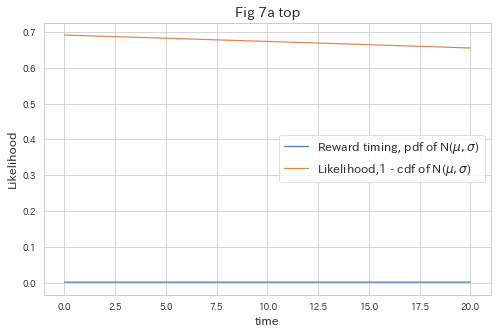

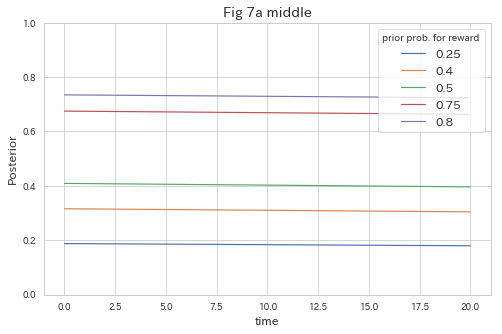

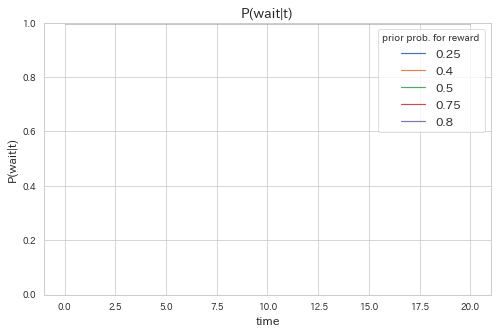

0.10050251256281408
0.0
0.10050251256281408
0.0
0.10050251256281408
0.0
0.10050251256281408
0.0
0.10050251256281408
0.0


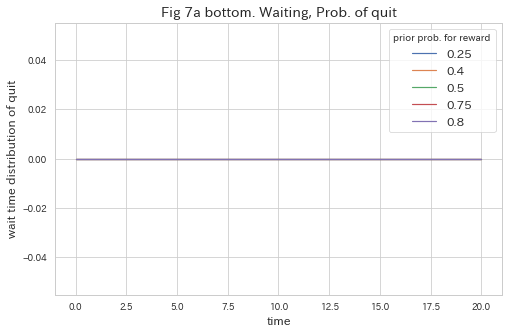

In [31]:
# tau is given by akmost 20/bins 
pr_all(mu=100,sigma=200,bins=200,beta=700,PRewards=[0.25,0.4,0.5,0.75,0.8] )
